# Please uncomment and import the following packages to make this work

In [1]:
# pip install ccxt
# pip install pandas
# pip install numpy
# pip install datetime
# pip install matplotlib
# pip install from stocktrends 


In [2]:
import pandas as pd
import numpy as np
import ccxt
import datetime as dt
import json
import requests
import matplotlib.pyplot as plt
from stocktrends import Renko, indicators
import seaborn as sns
import statistics


# Functions and other necessary things

In [3]:
# #Function to get 24 hour for 3 min
# def get_bars(symbol, interval = '3m'):
#     root_url = 'https://api.binance.com/api/v1/klines'
#     url = root_url + '?symbol=' + symbol + '&interval=' + interval
#     data = json.loads(requests.get(url).text)
#     df = pd.DataFrame(data)
#     df.columns = ['open_time',
#                  'open', 'high', 'low', 'close', 'volume',
#                  'close_time', 'qav', 'num_trades',
#                  'taker_base_vol', 'taker_quote_vol', 'ignore']
#     df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
#     df.reset_index(inplace = True)
#     df['date'] = df['index']
#     df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype('float')
#     df['open_time'] = pd.to_datetime(df['open_time'],unit = "ms")
#     df['close_time'] = pd.to_datetime(df['close_time'],unit = "ms")
#     return df

#Function to return Ichimoku values 
def ichimoku(dataframe, conversion_line_period=9, base_line_periods=26, 
              laggin_span=52, displacement=26): 
     #Ichimoku cloud indicator 

     df = dataframe.copy() 

     high_9 = df['high'].rolling(window=conversion_line_period).max() 
     low_9 = df['low'].rolling(window=conversion_line_period).min() 
     df['tenkan_sen'] = (high_9 + low_9) / 2 

     high_26 = df['high'].rolling(window=base_line_periods).max() 
     low_26 = df['low'].rolling(window=base_line_periods).min() 
     df['kijun_sen'] = (high_26 + low_26) / 2 

     # this is to extend the 'df' in future for 26 days 
     # the 'df' here is numerical indexed df 
     last_index = df.iloc[-1:].index[0] 
     last_date = df['date'].iloc[-1].date() 

     df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26) 

     high_52 = df['high'].rolling(window=laggin_span).max() 
     low_52 = df['low'].rolling(window=laggin_span).min() 
     df['senkou_span_b'] = ((high_52 + low_52) / 2).shift(displacement) 

     # most charting softwares dont plot this line 
     df['chikou_span'] = df['close'].shift(displacement*-1)  # sometimes -26 
  
     return { 
         'tenkan_sen': df['tenkan_sen'], 
         'kijun_sen': df['kijun_sen'], 
         'senkou_span_a': df['senkou_span_a'], 
         'senkou_span_b': df['senkou_span_b'], 
         'chikou_span': df['chikou_span'], 
         'cloud_green': df['senkou_span_a'] > df['senkou_span_b'], 
         'cloud_red': df['senkou_span_b'] > df['senkou_span_a'] 
     } 
  

In [4]:
#LIST OF USEFUL CALLS AND WHAT THEY DO

# binance.fapiPublic_get_ticker_24hr()
'''
24h summary of all tickers
Can't figure out how to specify ticker
List
Dict order
{'symbol': 'BTCUSDT',
 'priceChange': '60.60',
 'priceChangePercent': '0.521',
 'weightedAvgPrice': '11687.60',
 'lastPrice': '11697.24',
 'lastQty': '0.048',
 'openPrice': '11636.64',
 'highPrice': '11784.21',
 'lowPrice': '11575.78',
 'volume': '132272.584',
 'quoteVolume': '1545948827.30',
 'openTime': 1598822880000,
 'closeTime': 1598909306515,
 'firstId': 195816875,
 'lastId': 196301241,
 'count': 484365}
'''

# fapiPublic_get_historicaltrades

'''
IDK
'''

# fapiPublicGetTicker24hr
'''
24h summary of all tickers
Can't figure out how to specify ticker
List
'''

# fapiPrivate_get_openorders
'''
list of open orders
{}
'''

# fapiPrivate_get_balance

'''
List showing account balance in USDT and BNB
list[0] is dict

{'accountAlias': 'Alias',
 'asset': 'USDT',
 'balance': 'balance',
 'withdrawAvailable': 'available',
 'updateTime': 1598596107504}
 
'''


# fapiPrivate_delete_allopenorders

'''
DELETES OPEN ORDERS
'''


'\nDELETES OPEN ORDERS\n'

# This is me testing binance package calls and seeing the output

In [5]:
# test_call = binance.fapiPublic_get_ticker_24hr()

# Ignore this block. It's just to keep

In [6]:
# This is for formatting MEGA file
# large = 4
# hour = 0
# test = pd.DataFrame()
# test['high'] = ''
# test['low'] = ''
# test['open'] = ''
# test['close'] = ''
# test['date'] = ''
# values = []

# for i in range(len(df)):
#     if i==(len(df)-1):
#         values.append(df['mark_price'][i])
#         data = {'high':max(values), 'low':min(values), 'open':values[0], 'close':values[len(values)-1], 'date':df['timestamp'][i]}
#         test = test.append(data,  ignore_index=True)
#         large+=5
#         values = []
#         break
    
#     if df['timestamp'][i].minute<large and df['timestamp'][i].minute==0:
#         values.append(df['mark_price'][i])
        
#     if df['timestamp'][i].minute != 0 and df['timestamp'][i+1].minute==0 and df['timestamp'][i].hour!=23:
#         large = 4
#         values.append(df['mark_price'][i])
#         data = {'high':max(values), 'low':min(values), 'open':values[0], 'close':values[len(values)-1]}
#         test = test.append(data,  ignore_index=True)
#         values = []
        
        
#     if df['timestamp'][i].minute<large:
#         values.append(df['mark_price'][i])
        
#     if df['timestamp'][i+1].minute > large and df['timestamp'][i+1].minute!=0:
#         values.append(df['mark_price'][i])
#         data = {'high':max(values), 'low':min(values), 'open':values[0], 'close':values[len(values)-1],'date':df['timestamp'][i]}
#         test = test.append(data,  ignore_index=True)
#         large+=5
        
        
        
 
            

# API KEYS

In [7]:
# Bringing in secret key
binance=ccxt.binance({
    ''
    'apiKey': 'heuvH4cR0MMA8aFsuoa3SYX3e3ivetLos90m2CdQE3Kz81zcB5azJ2YlzWuThvW0',
    'secret': '1FRyWck48hnwkTdl3JTPCwc5Lzii53BVpEjAcZW93e6khBD8bUNtVyoBArP23Fl7',
    'timeout': 30000,
    'enableRateLimit': True,
})

# Pulling in the data from my computer

In [8]:
cd Desktop

C:\Users\jonat\Desktop


In [9]:
cd CryptoDaTa

C:\Users\jonat\Desktop\CryptoDaTa


In [10]:
# Bring in data and format correctly
df = pd.read_csv(f'ETHUSDT-5m.csv')
df = df.rename(columns = {'_t':'date','_o':'open', '_h':'high', '_l':'low', '_c':'close','_v':'volume'})
df['date'] = pd.to_datetime(df['date'], unit = 'ms')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,date,open,high,low,close,volume
0,2020-06-01 00:00:00,231.55,231.55,230.61,231.17,11936.720
1,2020-06-01 00:05:00,231.15,232.77,231.11,232.53,13297.875
2,2020-06-01 00:10:00,232.55,233.40,232.40,233.08,11815.278
3,2020-06-01 00:15:00,233.07,233.78,232.95,233.06,9007.776
4,2020-06-01 00:20:00,233.06,233.51,232.96,233.20,4261.493


# Renko-ify data

In [11]:
#Turn data into renko

renko = Renko(df)
renko.brick_size = 1.26
data = renko.get_ohlc_data()
print(data.tail())


                    date    open    high     low   close  uptrend
1789 2020-08-19 21:00:00  404.46  405.72  404.46  405.72     True
1790 2020-08-19 21:20:00  405.72  406.98  405.72  406.98     True
1791 2020-08-19 21:35:00  406.98  408.24  406.98  408.24     True
1792 2020-08-19 21:40:00  406.98  406.98  405.72  405.72    False
1793 2020-08-19 22:25:00  406.98  408.24  406.98  408.24     True


# Visualizations!

In [12]:
test = ichimoku(data)
ichi_df = data.copy()
random = pd.DataFrame(test)
ichi_df = ichi_df.join(random)


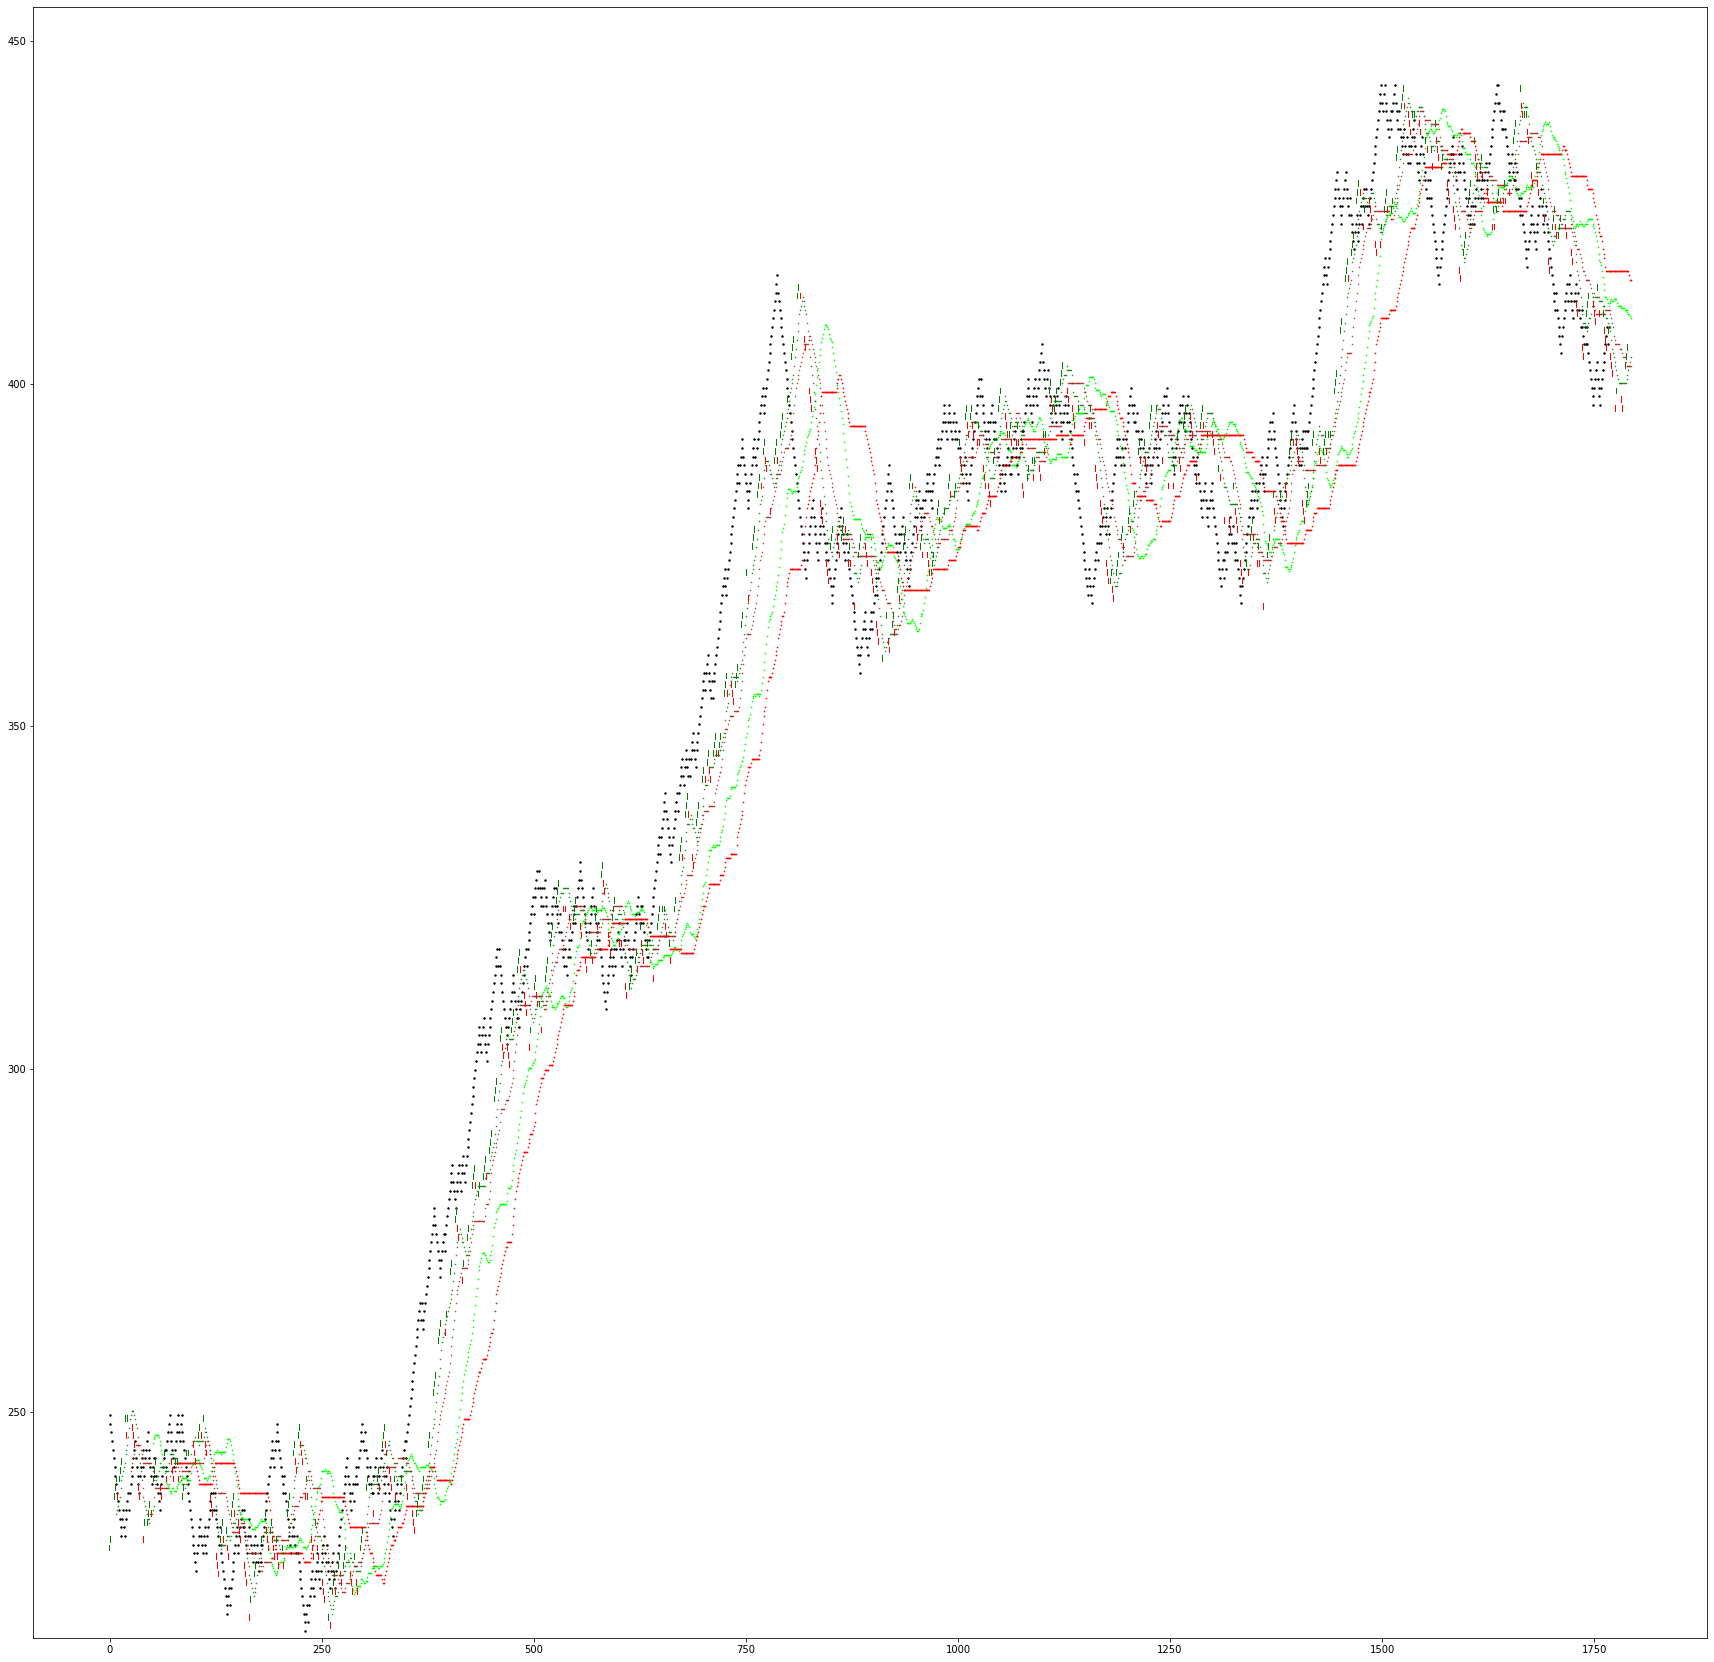

In [13]:
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

for i in range(len(data)):
   
    if data['uptrend'][i]:
        ax.bar(i,1, width = 0.5, color = 'g', bottom = data['close'][i]-1, align = 'center')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = 2)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)
    else:
        ax.bar(i, 1, width = 0.5, color = 'r', bottom = data['close'][i]-1, align = 'edge')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = 2)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)
plt.show()

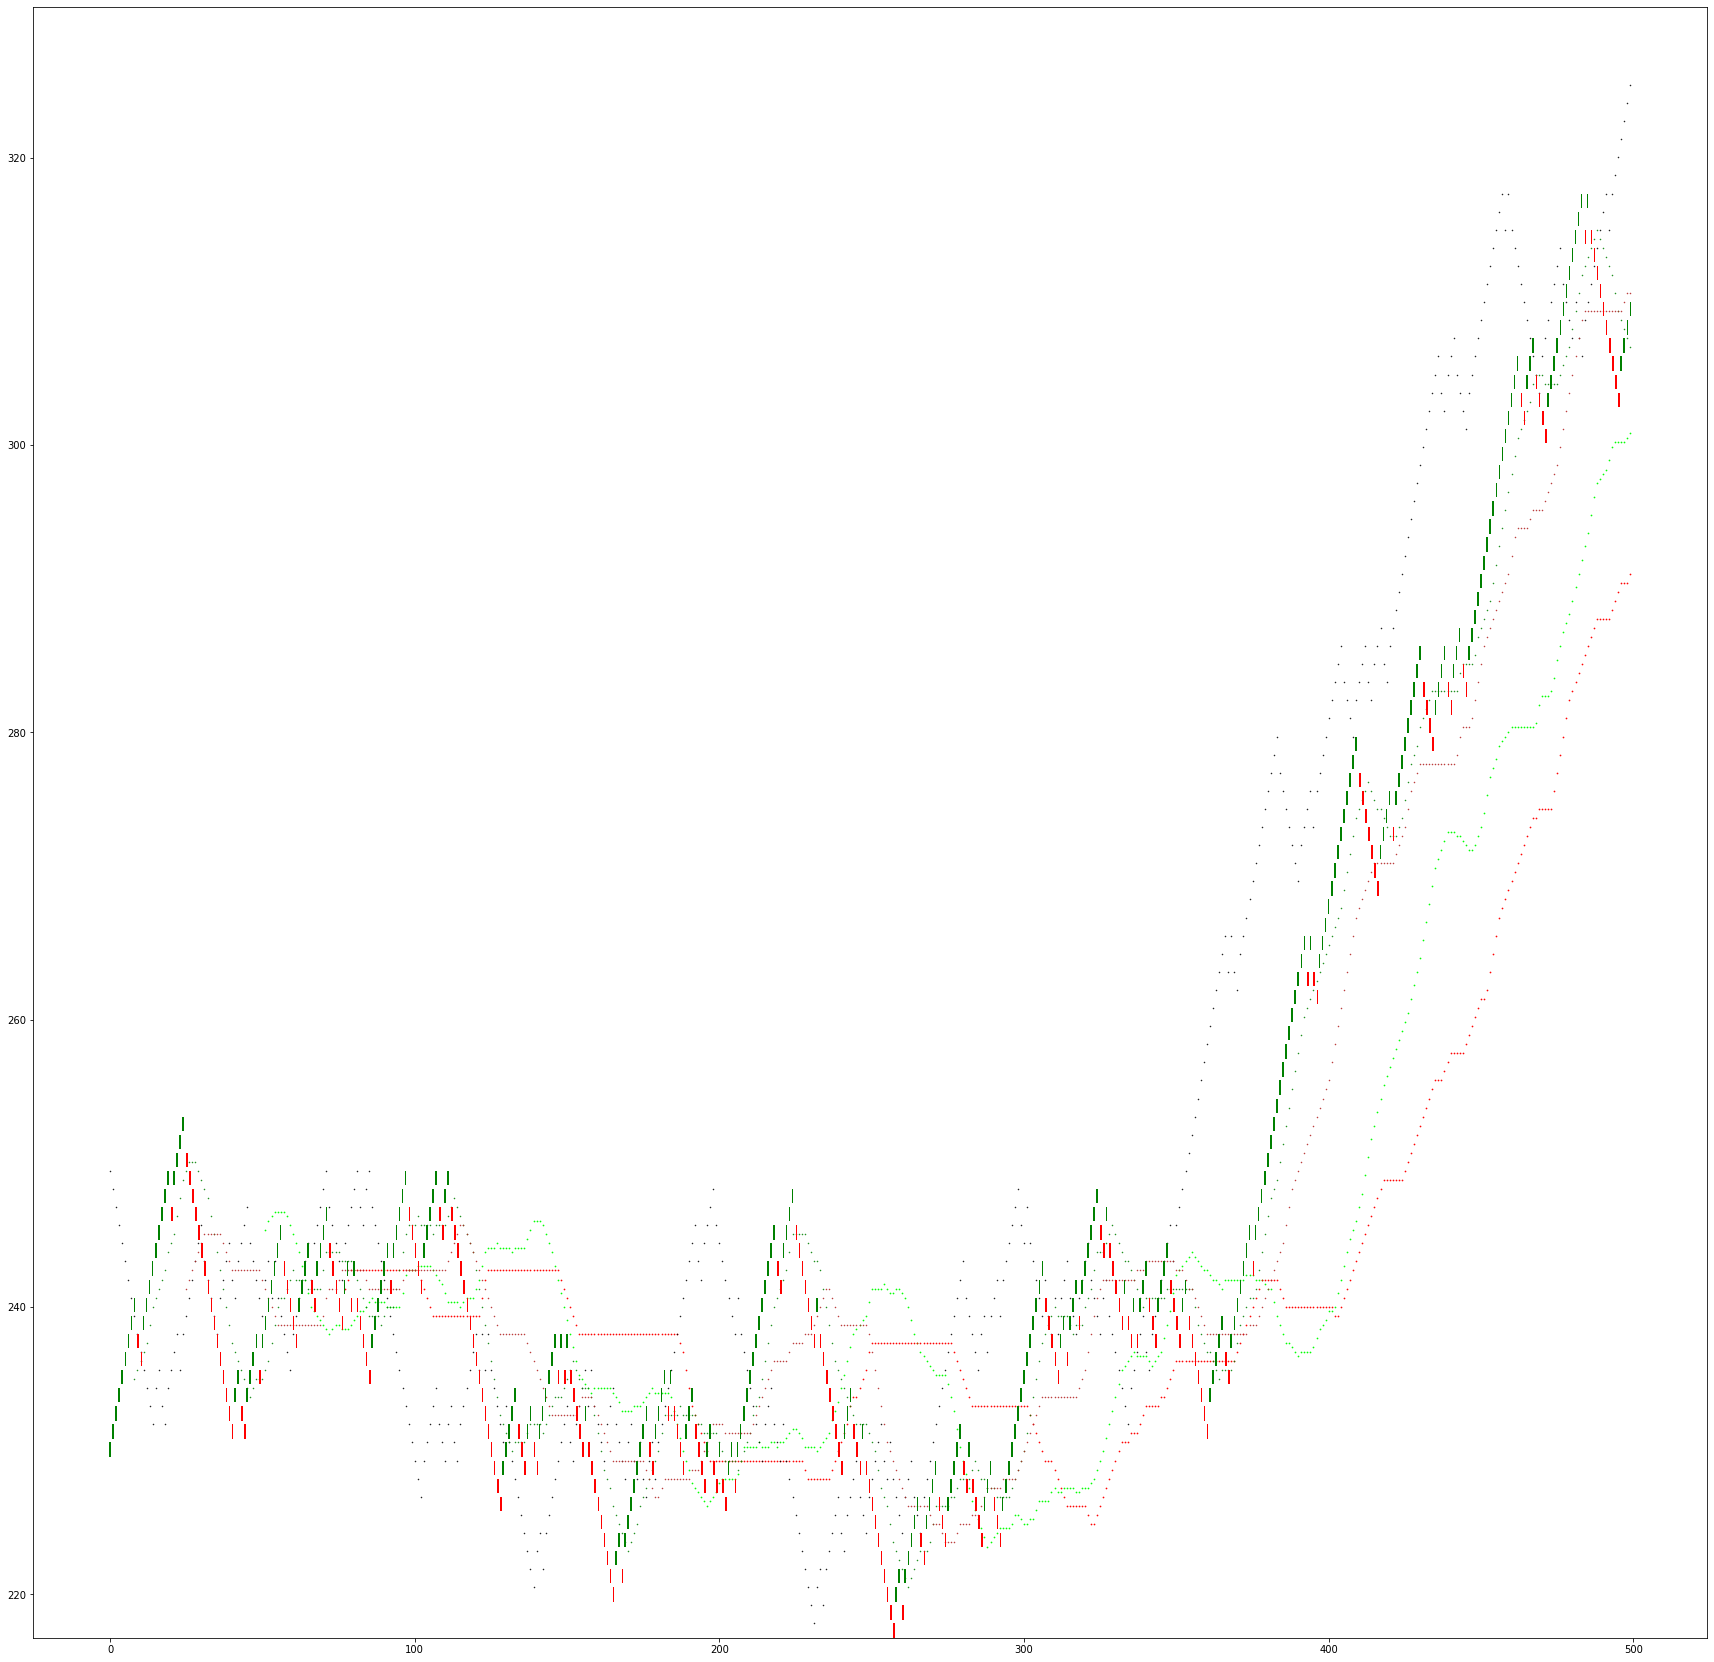

In [14]:
plot_df = data[0:500]
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

for i in range(len(plot_df)):
   
    if plot_df['uptrend'][i]:
        ax.bar(i,1, width = 0.5, color = 'g', bottom = plot_df['close'][i]-1, align = 'center')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = .25)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)
    else:
        ax.bar(i, 1, width = 0.5, color = 'r', bottom = plot_df['close'][i]-1, align = 'edge')
        plt.scatter(i,ichi_df['senkou_span_a'][i], color = 'lime', s = .5)
        plt.scatter(i,ichi_df['senkou_span_b'][i], color = 'red', s = .5)
        plt.scatter(i,ichi_df['chikou_span'][i], color = 'black', s = .25)
        plt.scatter(i,ichi_df['tenkan_sen'][i], color = 'green', s = .25)
        plt.scatter(i,ichi_df['kijun_sen'][i], color = 'firebrick', s = .25)

plt.show()

In [15]:
resetted_index = ichi_df.reset_index()

In [16]:
len(ichi_df)

1794

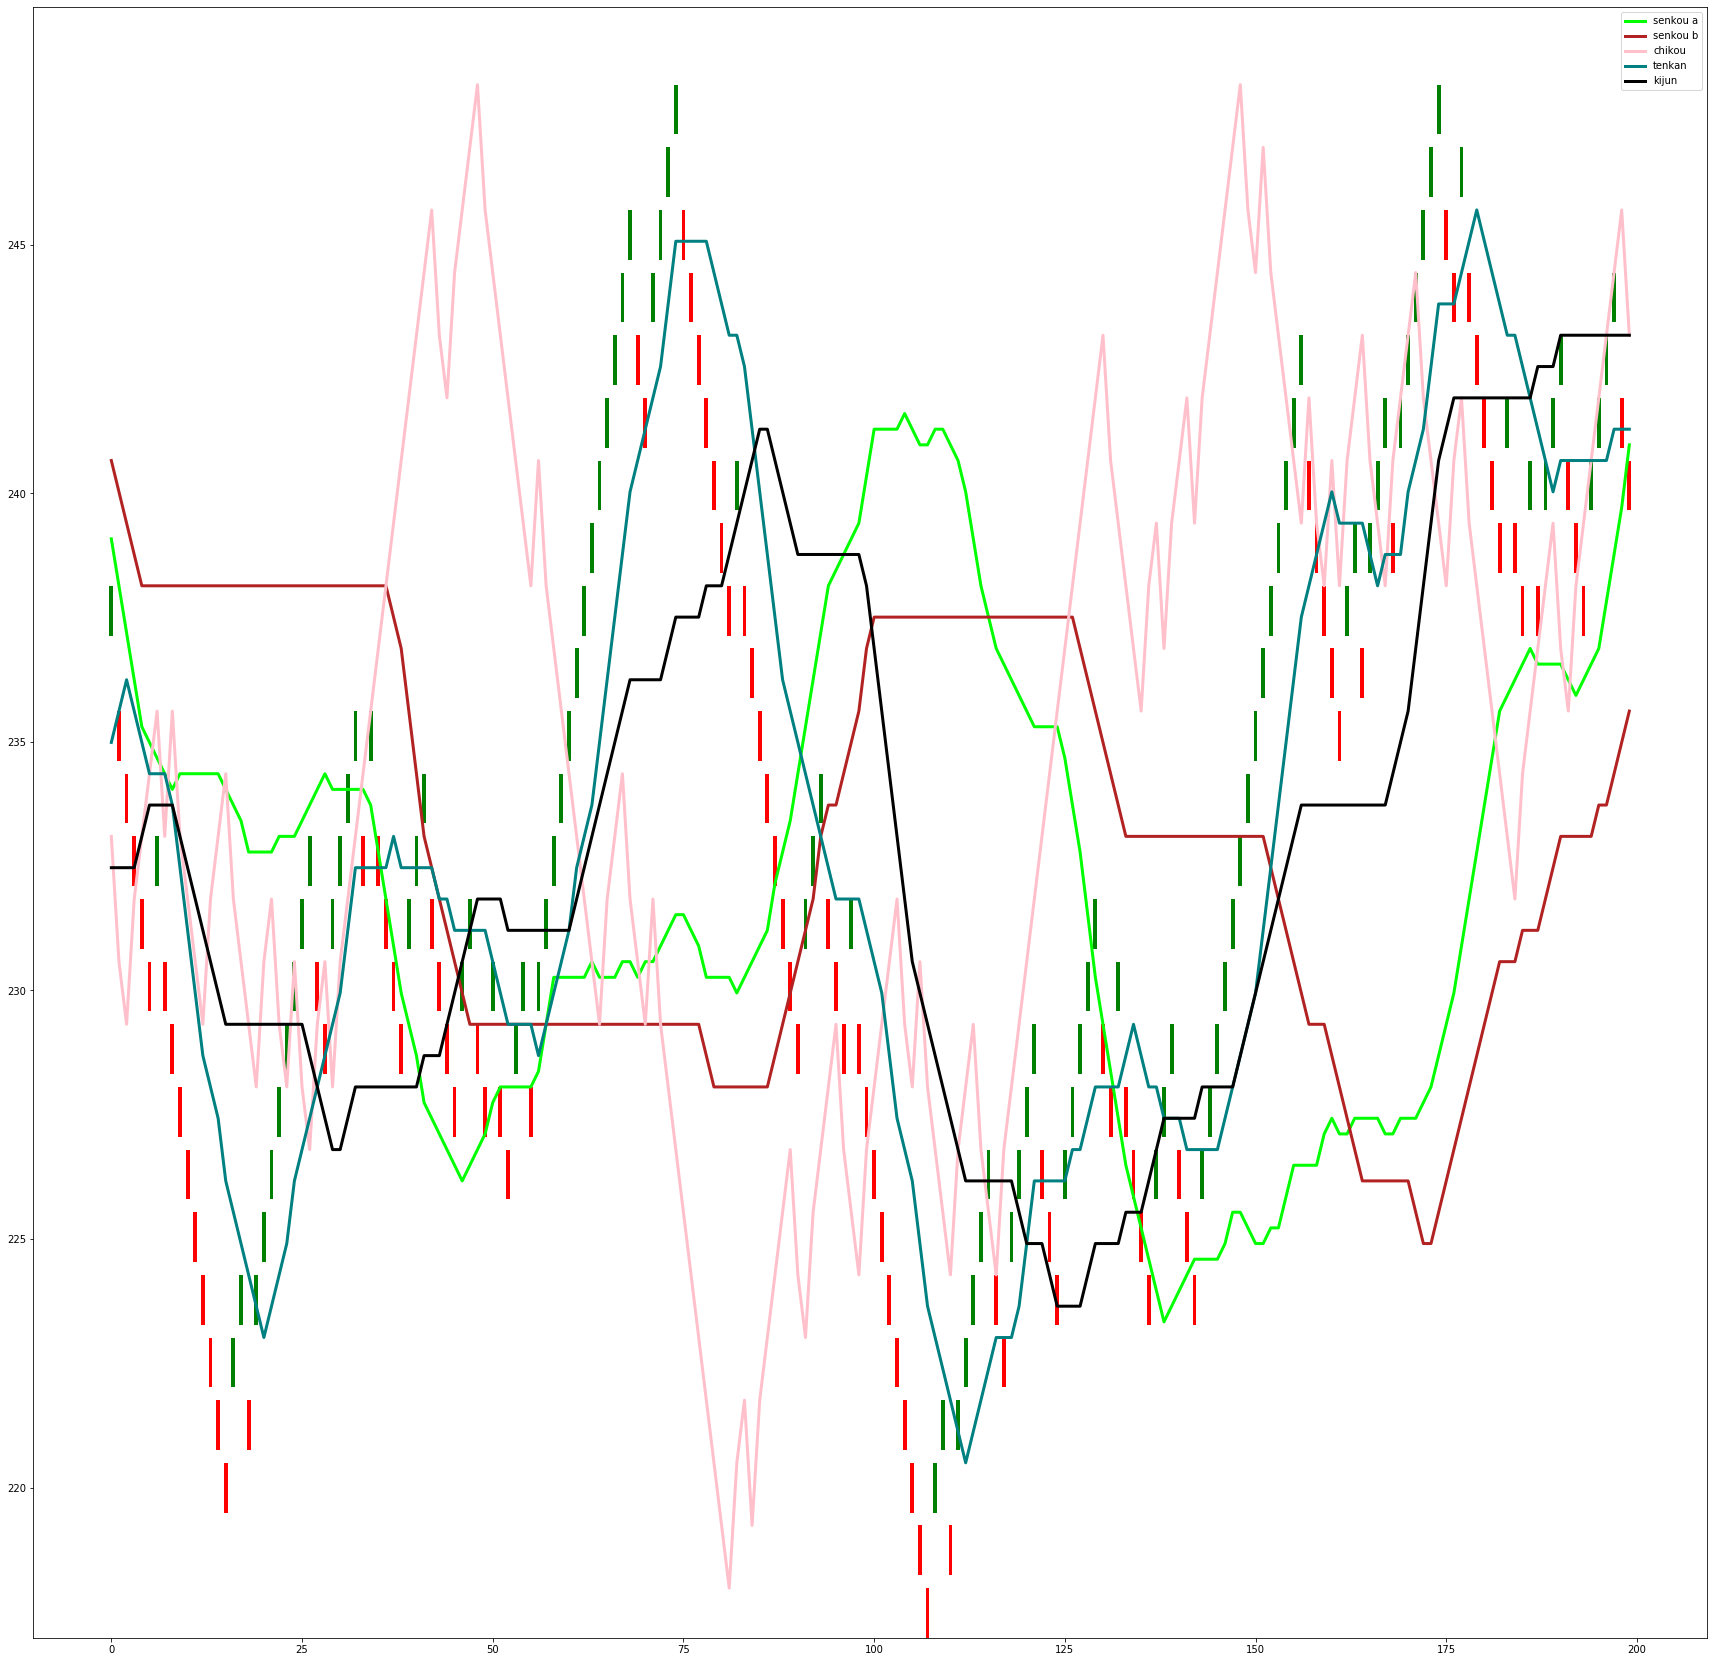

In [17]:
plot_df = ichi_df[150:350].reset_index() 
plt.figure(figsize = (30,30))
ax = plt.subplot(111)

for i in range(len(plot_df)):
   
    if plot_df['uptrend'][i]:
        ax.bar(i,1, width = 0.5, color = 'g', bottom = plot_df['close'][i]-1, align = 'center')
        
        
   
    else:
        ax.bar(i, 1, width = 0.5, color = 'r', bottom = plot_df['close'][i]-1, align = 'center')
        
        
     
''
plt.plot(plot_df.index.values,(plot_df[0:200]['senkou_span_a']), color = 'lime', linewidth = 3, label = 'senkou a')
plt.plot(plot_df.index.values,(plot_df[0:200]['senkou_span_b']), color = 'firebrick', linewidth = 3, label = 'senkou b')
plt.plot(plot_df.index.values,(plot_df[0:200]['chikou_span']), color = 'pink', linewidth = 3, label = 'chikou')
plt.plot(plot_df.index.values,(plot_df[0:200]['tenkan_sen']), color = 'teal', linewidth = 3, label = 'tenkan')
plt.plot(plot_df.index.values,(plot_df[0:200]['kijun_sen']), color = 'black', linewidth = 3, label = 'kijun')


plt.legend()
plt.show()

# Actual STRATEGY TIME!

In [18]:
ichi_df[150:180].head(20)

,date,open,high,low,close,uptrend,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,cloud_green,cloud_red
150,2020-06-13 19:35:00,236.88,238.14,236.88,238.14,True,234.99,232.47,239.085,240.66,233.10,False,True
151,2020-06-14 06:45:00,236.88,236.88,235.62,235.62,False,235.62,232.47,238.140,240.03,230.58,False,True
152,2020-06-14 06:45:00,235.62,235.62,234.36,234.36,False,236.25,232.47,237.195,239.40,229.32,False,True
153,2020-06-14 21:40:00,234.36,234.36,233.10,233.10,False,235.62,232.47,236.250,238.77,231.84,False,True
154,2020-06-14 22:10:00,233.10,233.10,231.84,231.84,False,234.99,233.10,235.305,238.14,233.10,False,True
155,2020-06-14 22:20:00,231.84,231.84,230.58,230.58,False,234.36,233.73,234.990,238.14,234.36,False,True
156,2020-06-14 22:30:00,231.84,233.10,231.84,233.10,True,234.36,233.73,234.675,238.14,235.62,False,True
157,2020-06-15 01:40:00,231.84,231.84,230.58,230.58,False,234.36,233.73,234.360,238.14,233.10,False,True
158,2020-06-15 01:45:00,230.58,230.58,229.32,229.32,False,233.73,233.73,234.045,238.14,235.62,False,True
159,2020-06-15 03:20:00,229.32,229.32,228.06,228.06,False,232.47,233.10,234.360,238.14,233.10,False,True


In [19]:
#Values all start at 77
ichi_df.head(77)

,date,open,high,low,close,uptrend,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,cloud_green,cloud_red
0,2020-06-01 00:00:00,229.32,230.58,229.32,230.58,True,NaN,NaN,NaN,NaN,249.48,False,False
1,2020-06-01 00:05:00,230.58,231.84,230.58,231.84,True,NaN,NaN,NaN,NaN,248.22,False,False
2,2020-06-01 00:20:00,231.84,233.10,231.84,233.10,True,NaN,NaN,NaN,NaN,246.96,False,False
3,2020-06-01 01:30:00,233.10,234.36,233.10,234.36,True,NaN,NaN,NaN,NaN,245.70,False,False
4,2020-06-01 01:50:00,234.36,235.62,234.36,235.62,True,NaN,NaN,NaN,NaN,244.44,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2020-06-05 10:10:00,245.70,245.70,244.44,244.44,False,243.81,241.29,238.140,NaN,246.96,False,False
73,2020-06-05 10:55:00,244.44,244.44,243.18,243.18,False,243.81,241.29,238.455,NaN,245.70,False,False
74,2020-06-05 11:50:00,243.18,243.18,241.92,241.92,False,243.81,241.29,238.770,NaN,244.44,False,False
75,2020-06-05 15:00:00,241.92,241.92,240.66,240.66,False,243.81,241.92,238.770,NaN,243.18,False,False


In [164]:
# Might need to add the -26 depending on backtest results. MACD EXIT SIGNAL
# do previous cloud convergence lead to greater profit
# Ask how many API calls i get per second per instrument
# Commission will be taken out of profit when i sell or stop loss

# Comission is backtested higher than usual. This is just because nothing is perfect and to account for real-world issues that are hard to forsee
def backtesting(df):
    # Short/Long/Stoploss/Exit/Take profit
    # Account balance
    # holding status
    # Holding amount
    # List of money earned from trades
    # Length in trade
    # How much in account. Can swap with futures 
    account_balance = 100000
    
    # 0 means looking and 1 means holding
    status = 0
    
    # Money earned
    earned = []
    
    # Time in winning trade
    wtimed = []
    
    # Time in losing trade
    ltimed = []
    
    # Holding money
    hold = ''
    
    #Identify if it is long or short
    long = 0
    short = 0
    #variable to make code easier to read
    money = 0
    
    # For counting time
    time = 0
    
    sl_counter = []
    
    for i in range(len(df)): 
        
#         #Enter in long trade. Price above cloud, faster>slower, not currently in a position
        if (df['open'][i]>df['senkou_span_a'][i] and 
            df['cloud_green'][i]==True and 
            df['kijun_sen'][i]<df['tenkan_sen'][i] and 
            df['uptrend'][i-1]==True and
            status == 0):
            
            #Change to enter position
            status=1
            
            #Invest 1k (investment amount can always change but easy math is easy)
            hold = (1000/df['close'][i])*-1
            #you're investing so you're not gonna have that 1k liquid
            account_balance +=-1000
            #make sure people know it's a long
            long = 1
            #Time start
            time = df['date'][i]
            
            
         #Exit a long trade
        elif (long == 1 and
              status == 1 and 
              (df['close'][i-26]>=df['chikou_span'][i] or 
               df['kijun_sen'][i]>=df['tenkan_sen'][i])):
            #We are not holding
            status = 0
            long = 0
            # Calculate earnings with commission
            
            money = ((((df['close'][i])*0.00032)-1000))-(hold*(df['close'][i]))
            earned.append(money)
            if money>=0:
                wtimed.append(df['date'][i]-time)
                time = 0
            else:
                ltimed.append(df['date'][i]-time)
                time = 0
                
         #stop loss for long (stop loss theoretically could be profitable if there was a massive jump)
        elif (long == 1 and status == 1 and df['uptrend'][i-1]==False and df['uptrend'][i]==False):
            #We are not holding
            status = 0
            long = 0
            
            # Calculate earnings with commission
            
            money = ((((df['close'][i])*0.00032)-1000))-(hold*(df['close'][i]))
            earned.append(money)
            if money>=0:
              
                wtimed.append(df['date'][i]-time)
                time = 0
                money = 0
            else:
                
                ltimed.append(df['date'][i]-time)
                time = 0
                money = 0
        
            
        #Enter in a short trade. Price below cloud, faster<slower, not currently in a position
        if (df['open'][i]<df['senkou_span_a'][i] and            # price under cloud
            df['cloud_red'][i]==True and     #cloud is red
            df['kijun_sen'][i]>=df['tenkan_sen'][i] and     #Tenkan cross Kijun downwards
            df['uptrend'][i-1]==False and                           #Going down
            status == 0): 
            
           
            status = 1  #Change to enter position
            short = 1
            
            
            hold = (1000/df['close'][i]) #Invest 1k (calculates how much of the crypto I'm holding)
            
            account_balance +=-1000 #you're investing so you're not gonna have that 1k liquid
            
            time = df['date'][i] #time start
        
       
        #exit a short trade
        elif  (status == 1 and
               short == 1 and
               (df['close'][i-26]<=df['chikou_span'][i] or 
                df['kijun_sen'][i]<=df['tenkan_sen'][i])):
            #We are not holding
            status = 0
            short = 0
            
            #calculate earnings with commission
            
            money = ((((df['close'][i])*0.00032)+1000)-(hold*(df['close'][i])))
            earned.append(money)
            if money>=0:
                
                wtimed.append(df['date'][i]-time)
                time = 0
                money = 0
            else:
                
                ltimed.append(df['date'][i]-time)
                time = 0
                money = 0
        
       
        #stoploss for short (don't need long since it will be executed before)
        elif  (status == 1 and short ==1 and df['uptrend'][i-1]==True and df['uptrend'][i]==True):
                 #We are not holding
            status = 0
            short = 0
            #calculate earnings with commission
            sl_counter.append(1)
            money = ((((df['close'][i])*0.00032)+1000)-(hold*(df['close'][i])))
            earned.append(money)
            if money>=0:
                
                wtimed.append(df['date'][i]-time)
                time = 0
                money = 0
            else:
                
                ltimed.append(df['date'][i]-time)
                time = 0
                money = 0
    profit = sum(earned)
    wins = [w for w in earned if w>0]
    loss = [l for l in earned if l<0]
#     wtt = statistics.mean(wtimed)
#     ltt = statistics.mean(ltimed)
    Twt = len(wtimed)
    Tlt = len(ltimed)
    TNT = len(earned)
    SLC = len(sl_counter)
    ML = min(loss)
    MG = max(wins)
    MW = max(wins)
    AGBB = statistics.mean(wins)
    AL = statistics.mean(loss)
    print(f'Summary Report with renko strat is as follows:')
    print('------------------------------------------------------------')
    print(f'Amount earned is :                                {profit}')
#     print(f'Avg time spent in winning trades:                 {wtt}')
#     print(f'Avg time spent in winning trades:                 {ltt}')
    print(f"Total number of trades:                           {TNT}")
    print(f'Total number of winning trades:                   {Twt}')
    print(f'Total number of losing trades:                    {Tlt}')
    print(f'Total number of stop losses:                      {SLC}') #This was for fixing code
    print(f'Max gain is:                                      {MG}')
    print(f'Max loss is:                                      {ML}')
    print(f'Avg gain is:                                      {AGBB}')
    print(f'Avg loss is:                                      {AL}')


In [165]:
backtesting(ichi_df)

Summary Report with renko strat is as follows:
------------------------------------------------------------
Amount earned is :                                545.8092935937428
Total number of trades:                           112
Total number of winning trades:                   63
Total number of losing trades:                    49
Total number of stop losses:                      15
Max gain is:                                      72.24881405360782
Max loss is:                                      -16.87657654237273
Avg gain is:                                      12.913642421952932
Avg loss is:                                      -5.464289367128408


# Proof on long profit calc

#### Buy in when it's 232.88 and sell when it's 238.95

In [22]:
# Proof on how profit is calculated
hold = (1000/df['close'][10])*-1 #Enter long trade
money = (hold*(df['close'][10]))-(((df['close'][10])*0.00032)-1000) #exit at same price
print(money) #shows commission. 

#If the front number is higher, then that -0.7 should be positive 
money = ((((df['close'][77])*0.00032)-1000))-(hold*(df['close'][77])) #exit at lower price. 
print(money)

-0.07452159999991181
26.141390142219052


# Proof on short profit calc

#### Short when it's 238.95 and exit when it's 232.88

In [23]:
# Proof on how profit is calculated
hold = (1000/df['close'][77]) #Enter short trade
money = (hold*(df['close'][77]))-(((df['close'][77])*0.00032)+1000) #exit at same price
print(money) #shows commission. 

#If the front number is lower, then that -0.7 should be positive 
money = ((((df['close'][10])*0.00032)+1000)-(hold*(df['close'][10]))) #exit at same price
print(money)

-0.0764640000001009
25.477325533877433
